In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

X_cleaned=np.delete(X,142,axis=0)
y_cleaned=np.delete(y,142,axis=0)


X_train,y_train,X_test,y_test=train_test_split(X_cleaned,y_cleaned,test_percent=0.3,random_state=42)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (105, 4), y_train shape: (105,)
X_test shape: (44, 4), y_test shape: (44,)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0]


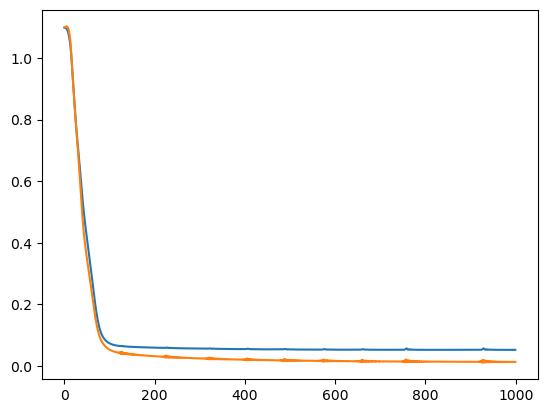

In [41]:
hidden_layers=np.array([20,10])
mlp = MLP(4,3,hidden_layers,0.007,'adam')
mlp.fit(X_train,y_train,1000,X_test,y_test)
loss_history=mlp.get_history_loss()
test_history=mlp.get_history_test_loss()
plt.plot(loss_history)
plt.plot(test_history)


y_pred=mlp.predict(X_test)
print(y_pred)
print(y_test)

plt.show()

in softmax, Z is a vector

Below is my history to optimize and adjust paramters for this algorithm
First, my learning rate==0.05, epoch == 10000, hidden_layer_size==[5,3]


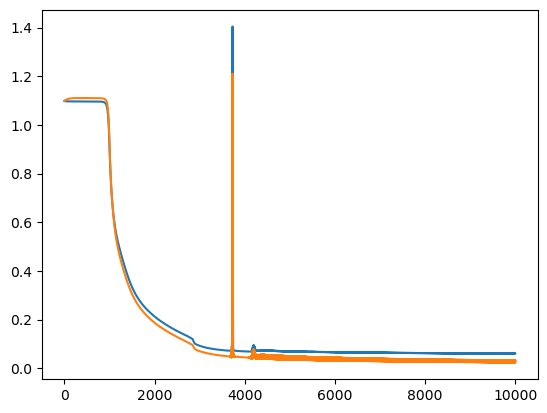

In [42]:
hidden_layers=np.array([2,3])
mlp = MLP(4,3,hidden_layers,0.05,'gradient_descent')
mlp.fit(X_train,y_train,10000,X_test,y_test)
loss_history=mlp.get_history_loss()
test_history=mlp.get_history_test_loss()
plt.plot(loss_history)
plt.plot(test_history)


y_pred=mlp.predict(X_test)

plt.show()

Here we can see the loss function actually does not converge to a small number during this period. Intuitively, we should increase learning rate to accelerate the speed of loss descending

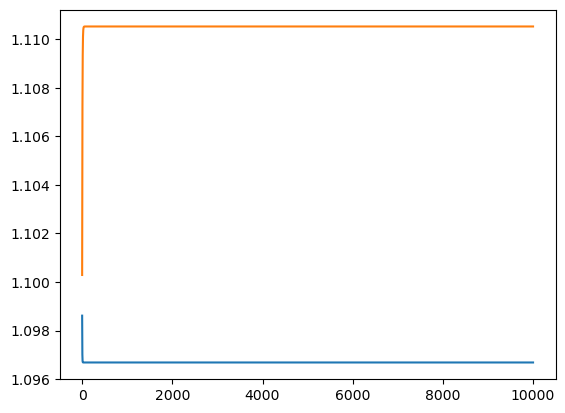

In [44]:
hidden_layers=np.array([2,3])
mlp = MLP(4,3,hidden_layers,0.5,'gradient_descent')
mlp.fit(X_train,y_train,10000,X_test,y_test)
loss_history=mlp.get_history_loss()
test_history=mlp.get_history_test_loss()
plt.plot(loss_history)
plt.plot(test_history)


y_pred=mlp.predict(X_test)

plt.show()

Adding learning rate did not make a difference. 
We should increase complexity of hidden layers

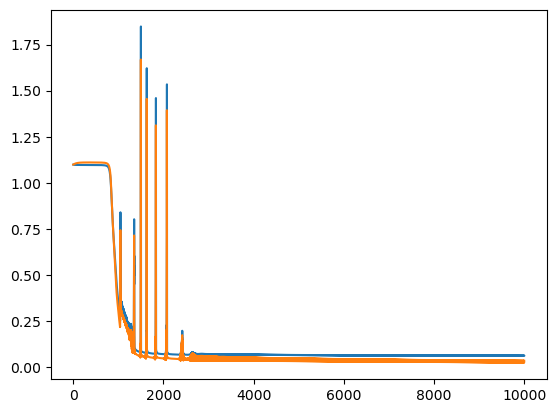

In [45]:
hidden_layers=np.array([20,10])
mlp = MLP(4,3,hidden_layers,0.05,'gradient_descent')
mlp.fit(X_train,y_train,10000,X_test,y_test)
loss_history=mlp.get_history_loss()
test_history=mlp.get_history_test_loss()
plt.plot(loss_history)
plt.plot(test_history)


y_pred=mlp.predict(X_test)

plt.show()

Although loss oscillate, it converges finally.
This oscillation suggests that we have a relatively large learning rate. 
This is counterintuitive because we believe the learning rate is too large that it could not converge. But after we adjust hidden layer size, we find that the learning rate is large. 
We should use a smaller learning rate.

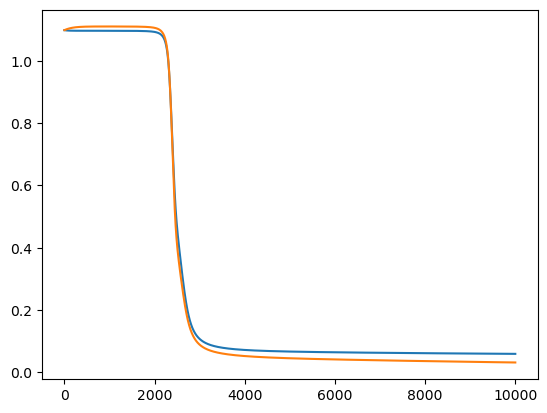

In [46]:
hidden_layers=np.array([20,10])
mlp = MLP(4,3,hidden_layers,0.02,'gradient_descent')
mlp.fit(X_train,y_train,10000,X_test,y_test)
loss_history=mlp.get_history_loss()
test_history=mlp.get_history_test_loss()
plt.plot(loss_history)
plt.plot(test_history)

plt.show()

The loss plot seems smoother than before. But there is always a plateau at early 2000 epochs. 
We use gradient descent to find the gradient way to decrease the function, but there actually some relative plane space where gradient is very small, this way we need a very long iteration to get away. And this is why loss could not converge at first. When we add size of hidden layers, we add approaches to get away.
To solve this, we can replace gradient descent with adam.
Adam optimizer is self-adaptive backward propagation algorithm. Self-adaptive means that it can adjust learning_rate autonomously.

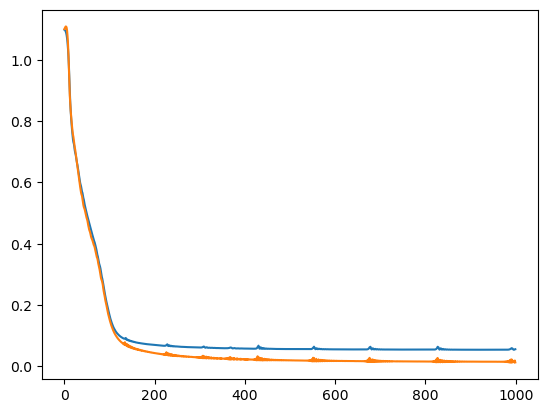

In [47]:
hidden_layers=np.array([20,10])
mlp = MLP(4,3,hidden_layers,0.02,'adam')
mlp.fit(X_train,y_train,1000,X_test,y_test)
loss_history=mlp.get_history_loss()
test_history=mlp.get_history_test_loss()
plt.plot(loss_history)
plt.plot(test_history)


y_pred=mlp.predict(X_test)

plt.show()

Compared to 'gradient descent', 'adam' speed up this process. 
(gradient descent uses about 2500 epochs while adam uses 100 epochs)
But there some impulse in the loss diagram. This suggests that learning rate is too large.

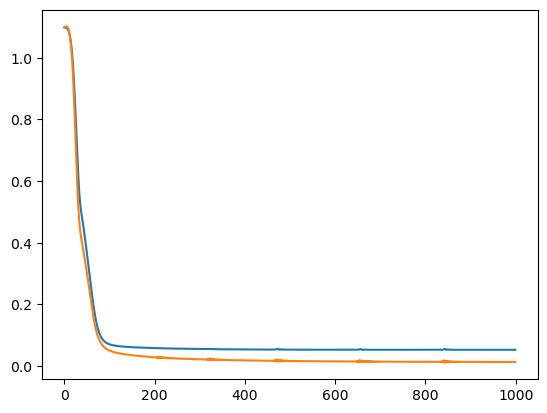

In [48]:
hidden_layers=np.array([20,10])
mlp = MLP(4,3,hidden_layers,0.006,'adam')
mlp.fit(X_train,y_train,1000,X_test,y_test)
loss_history=mlp.get_history_loss()
test_history=mlp.get_history_test_loss()
plt.plot(loss_history)
plt.plot(test_history)


y_pred=mlp.predict(X_test)

plt.show()

Much better

Then I want to adjust initial learning rate, to test if we can find the learning rate to minimal test loss
set epochs=1000

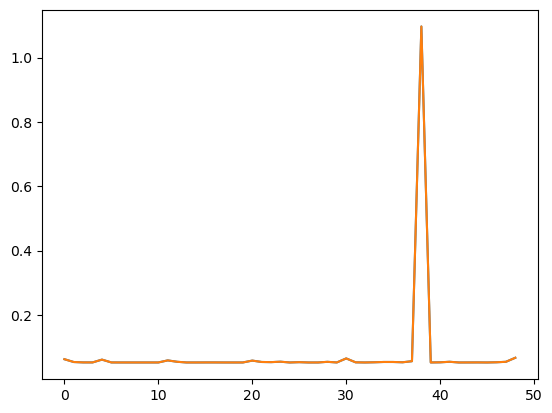

In [54]:
hidden_layers=np.array([20,10])
training_loss_array=[]
test_loss_array=[]
learning_rates = np.arange(0.001,0.05,0.001)
for i in learning_rates:
    mlp = MLP(4,3,hidden_layers,i,'adam')
    mlp.fit(X_train,y_train,1000,X_test,y_test)
    loss_history=mlp.get_history_loss()
    test_history=mlp.get_history_loss()
    training_loss_array.append(loss_history[-1]) # find latest loss
    test_loss_array.append(test_history[-1])
    
plt.plot(training_loss_array)
plt.plot(test_loss_array)

plt.show()

so when epochs ==1000 which is a rather large number, the final loss is similar(exclude some random divergent instance)

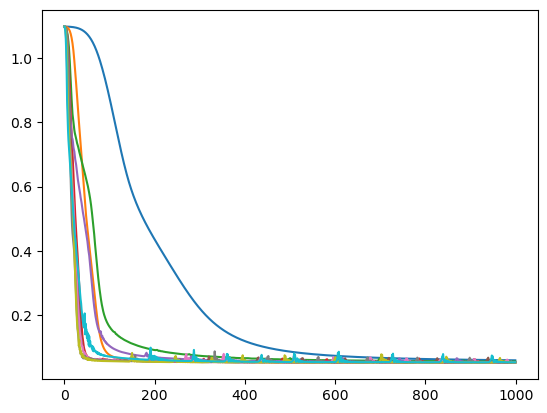

In [55]:
hidden_layers=np.array([20,10])
training_loss_array=[]
test_loss_array=[]
learning_rates = np.arange(0.001,0.05,0.005)
for i in learning_rates:
    mlp = MLP(4,3,hidden_layers,i,'adam')
    mlp.fit(X_train,y_train,1000,X_test,y_test)
    loss_history=mlp.get_history_loss()
    test_history=mlp.get_history_loss()
    plt.plot(loss_history)
plt.show()

In [ ]:
But learning rate really matters when it comes to convergent speed.
When learning rate increases, the model fit faster but easy to oscillate.

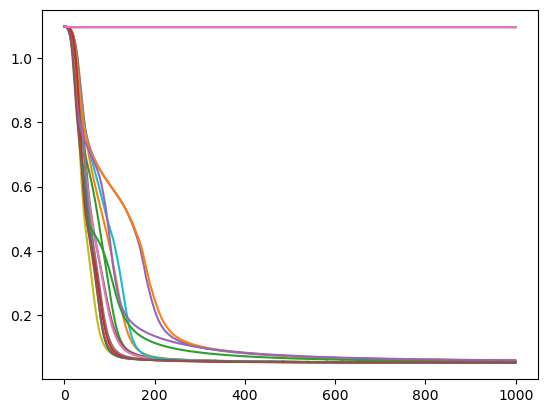

In [56]:
training_loss_array=[]
test_loss_array=[]
hidden_layer1 = np.arange(3,20,1)
for i in hidden_layer1:
    hidden_layers=np.array([i,10])
    mlp = MLP(4,3,hidden_layers,0.006,'adam')
    mlp.fit(X_train,y_train,1000,X_test,y_test)
    loss_history=mlp.get_history_loss()
    test_history=mlp.get_history_loss()
    plt.plot(loss_history)

plt.show()